In [21]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

TypeError: 'Bunch' object is not callable

In [22]:
iris_data = load_iris()
dd=pd.DataFrame(iris_data,columns=['sepal length','sepal width','petal length','petal width'])

ValueError: arrays must all be same length

In [4]:
index = range(100)

In [15]:
D = iris_data.data[index,:]
T = iris_data.target[index]
print(D)
print(T)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [6]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X=D, y=T)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
pred_prob = lr_model.predict_proba(X=D)

In [8]:
threshold_vals = np.linspace(0.0,0.99,num=20)

In [13]:
from sklearn.metrics import auc, roc_curve, confusion_matrix
tpr = []
fpr = []
for th in threshold_vals:
    y_cap = np.where(pred_prob[:,0]<th, 1,0)
    cm = confusion_matrix(y_true=T, y_pred=y_cap)
    #print(cm)
    tpr.append(cm[1,1]/sum(cm[1,:]))
    fpr.append(cm[0,1]/sum(cm[0,:]))

print(tpr)
print(fpr)

[0.0, 0.90000000000000002, 0.97999999999999998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.88]


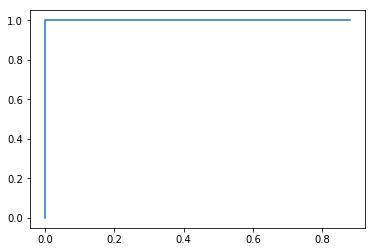

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr, tpr)

In [10]:
tpr, fpr, th = roc_curve(T, pred_prob[:,0])

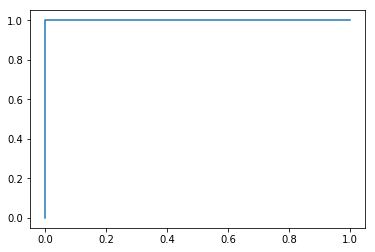

In [11]:
plt.plot(fpr, tpr)